<a href="https://colab.research.google.com/github/hammaad2002/Solar-Irradiance-Forecasting/blob/main/tcn_model_for_solar_irradiance_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!git clone https://github.com/hammaad2002/Solar-Irradiance-Forecasting.git
!pip install keras-tcn --no-dependencies 

In [ ]:
from tcn import TCN
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tqdm.notebook import tqdm
import random
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
# Assuming your DataFrame is named 'df'
desired_starting_row = 3
df = pd.read_csv('/kaggle/working/Solar-Irradiance-Forecasting/Solar Irradiance Dataset/2017Solar.csv', skiprows=desired_starting_row - 1)
df

,Year,Month,Day,Hour,Minute,GHI,Temperature,Dew Point,Relative Humidity,Pressure,Wind Direction,Wind Speed,Precipitable Water
0,2017,1,1,0,0,0,10.6,-17.4,12.29,949,103,0.7,0.7
1,2017,1,1,0,15,0,10.5,-17.4,12.37,949,107,0.7,0.7
2,2017,1,1,0,30,0,10.4,-17.4,12.45,949,111,0.7,0.7
3,2017,1,1,0,45,0,10.2,-17.3,12.74,949,115,0.7,0.7
4,2017,1,1,1,0,0,10.1,-17.3,12.83,949,120,0.7,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2017,12,31,22,45,0,11.2,-17.4,11.78,950,81,0.8,0.7
35036,2017,12,31,23,0,0,11.1,-17.4,11.86,950,85,0.8,0.7
35037,2017,12,31,23,15,0,11.0,-17.4,11.93,949,89,0.7,0.7
35038,2017,12,31,23,30,0,10.9,-17.4,12.01,949,94,0.7,0.7


In [ ]:
workingDf = df.drop(['Year', 'Month', 'Day', 'Hour', 'Minute'], axis = 1)
workingDf

,GHI,Temperature,Dew Point,Relative Humidity,Pressure,Wind Direction,Wind Speed,Precipitable Water
0,0,10.6,-17.4,12.29,949,103,0.7,0.7
1,0,10.5,-17.4,12.37,949,107,0.7,0.7
2,0,10.4,-17.4,12.45,949,111,0.7,0.7
3,0,10.2,-17.3,12.74,949,115,0.7,0.7
4,0,10.1,-17.3,12.83,949,120,0.7,0.7
...,...,...,...,...,...,...,...,...
35035,0,11.2,-17.4,11.78,950,81,0.8,0.7
35036,0,11.1,-17.4,11.86,950,85,0.8,0.7
35037,0,11.0,-17.4,11.93,949,89,0.7,0.7
35038,0,10.9,-17.4,12.01,949,94,0.7,0.7


In [ ]:
columns = workingDf.columns.tolist()
columns[0], columns[-1] = columns[-1], columns[0]
workingDf = workingDf[columns]
workingDf

,Precipitable Water,Temperature,Dew Point,Relative Humidity,Pressure,Wind Direction,Wind Speed,GHI
0,0.7,10.6,-17.4,12.29,949,103,0.7,0
1,0.7,10.5,-17.4,12.37,949,107,0.7,0
2,0.7,10.4,-17.4,12.45,949,111,0.7,0
3,0.7,10.2,-17.3,12.74,949,115,0.7,0
4,0.7,10.1,-17.3,12.83,949,120,0.7,0
...,...,...,...,...,...,...,...,...
35035,0.7,11.2,-17.4,11.78,950,81,0.8,0
35036,0.7,11.1,-17.4,11.86,950,85,0.8,0
35037,0.7,11.0,-17.4,11.93,949,89,0.7,0
35038,0.7,10.9,-17.4,12.01,949,94,0.7,0


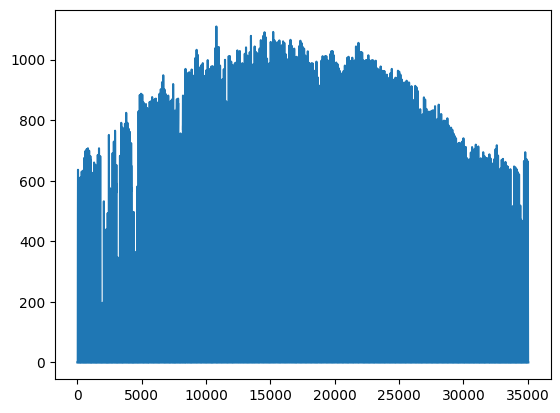

In [ ]:
target = workingDf['GHI']
target.plot()
plt.show()

In [ ]:
random_day = random.randint(1, 365)
random_day

136

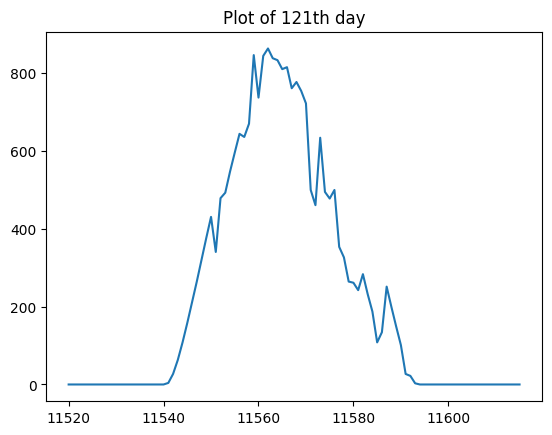

In [ ]:
random_day = random.randint(4, 365) # starting from 4th day so that I can write "th" in the title :)
target = workingDf['GHI'][(random_day-1)*96:(random_day*96)]
target.plot()
plt.title(str(f"Plot of {random_day}th day"))
plt.show()

In [ ]:
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(workingDf), columns=workingDf.columns)
df_normalized.head(10) # this normalizes the data in between range [0, 1]

,Precipitable Water,Temperature,Dew Point,Relative Humidity,Pressure,Wind Direction,Wind Speed,GHI
0,0.166667,0.291743,0.236287,0.122209,0.633333,0.286111,0.043860,0.0
1,0.166667,0.289908,0.236287,0.123159,0.633333,0.297222,0.043860,0.0
2,0.166667,0.288073,0.236287,0.124109,0.633333,0.308333,0.043860,0.0
3,0.166667,0.284404,0.238397,0.127553,0.633333,0.319444,0.043860,0.0
4,0.166667,0.282569,0.238397,0.128622,0.633333,0.333333,0.043860,0.0
5,0.166667,0.280734,0.238397,0.129572,0.633333,0.344444,0.035088,0.0
6,0.166667,0.278899,0.238397,0.130641,0.633333,0.355556,0.035088,0.0
7,0.166667,0.277064,0.240506,0.132660,0.633333,0.366667,0.035088,0.0
8,0.166667,0.275229,0.240506,0.133729,0.633333,0.377778,0.035088,0.0
9,0.166667,0.273394,0.240506,0.134679,0.633333,0.394444,0.035088,0.0


In [ ]:
per_day_readings = 4 * 24
window_length = 3 * per_day_readings    # we want our model to look back at the data of 3 days
horizon = 1                             # and then predict the next 15 minute reading

In [ ]:
df = df_normalized.values
stride = 1
x = []
y = []
for i in tqdm(range(0, len(df) - window_length, stride)):
    x.append(df[i:window_length+i, : ]) #GHI included but its past values only
    y.append(df[window_length+i,-1])                  #next GHI value

  0%|          | 0/34752 [00:00<?, ?it/s]

In [ ]:
x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

(34752, 288, 8)
(34752,)


In [ ]:
x[45]

array([[0.36111111, 0.55779817, 0.50843882, ..., 0.71388889, 0.09649123,
        0.56176736],
       [0.36111111, 0.56330275, 0.50632911, ..., 0.73888889, 0.11403509,
        0.56988278],
       [0.36111111, 0.56697248, 0.50632911, ..., 0.76111111, 0.12280702,
        0.57348963],
       ...,
       [0.33333333, 0.46238532, 0.66666667, ..., 0.45277778, 0.13157895,
        0.50405771],
       [0.33333333, 0.46788991, 0.66666667, ..., 0.66944444, 0.13157895,
        0.52569883],
       [0.33333333, 0.47522936, 0.66666667, ..., 0.88888889, 0.14035088,
        0.54102795]])

In [ ]:
y[44]

0.5410279531109107

In [ ]:
# splitting our dataset into two parts one will be training set and the other will be testing set
# Lets store last 5 days as our test set
x_train = x[:-per_day_readings*5]
y_train = y[:-per_day_readings*5]
x_test  = x[len(y) - per_day_readings*5:]
y_test  = y[len(y) - per_day_readings*5:]
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(34272, 288, 8)
(34272,)
(480, 288, 8)
(480,)


In [ ]:
set_epochs = 50

In [ ]:
tf.keras.mixed_precision.set_global_policy("mixed_float16")

model = keras.models.Sequential([
    TCN(input_shape=(288, 8), 
        kernel_size=5,
        nb_filters=16,
        dilations=[1, 2, 4],
        padding='causal',
        activation='relu',
        return_sequences=False,
        nb_stacks=2,
        use_skip_connections=True,
        use_batch_norm=True
        ),
    keras.layers.Dense(1,  activation="relu")
])
model.summary()
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.experimental.AdamW(),
              metrics=[keras.metrics.MeanAbsolutePercentageError()])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn (TCN)                   (None, 16)                15824     
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 15,841
Trainable params: 15,457
Non-trainable params: 384
_________________________________________________________________


In [ ]:
print('Train...')
history = model.fit(x_train, y_train,
                    epochs=50,
                    verbose=1, batch_size=128)

Train...
Epoch 1/50
268/268 [==============================] - 26s 47ms/step - loss: 0.2648 - mean_absolute_percentage_error: 97698280.0000
Epoch 2/50
268/268 [==============================] - 8s 29ms/step - loss: 0.0557 - mean_absolute_percentage_error: 1048812.5000
Epoch 3/50
268/268 [==============================] - 8s 29ms/step - loss: 0.0397 - mean_absolute_percentage_error: 688050.2500
Epoch 4/50
268/268 [==============================] - 8s 28ms/step - loss: 0.0313 - mean_absolute_percentage_error: 392057.3750
Epoch 5/50
268/268 [==============================] - 7s 28ms/step - loss: 0.0257 - mean_absolute_percentage_error: 311705.6875
Epoch 6/50
268/268 [==============================] - 8s 30ms/step - loss: 0.0222 - mean_absolute_percentage_error: 259074.5938
Epoch 7/50
268/268 [==============================] - 8s 28ms/step - loss: 0.0207 - mean_absolute_percentage_error: 184536.3750
Epoch 8/50
268/268 [==============================] - 8s 28ms/step - loss: 0.0183 - mean_ab

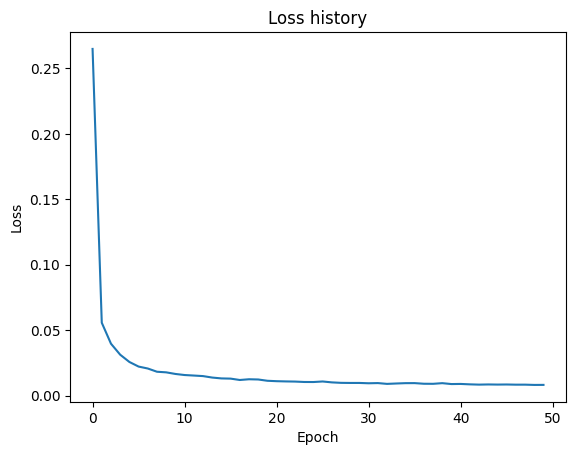

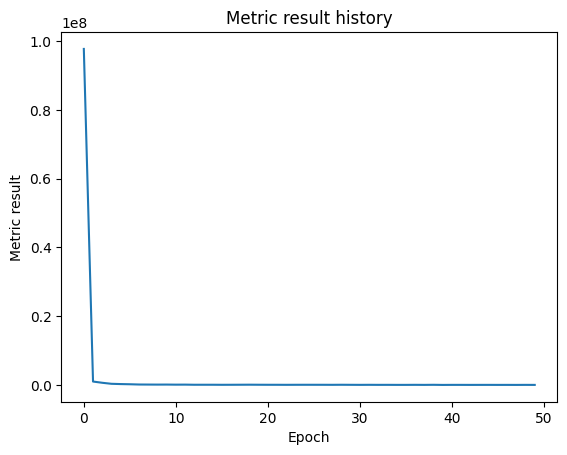

In [ ]:
import matplotlib.pyplot as plt

# Extract the history of loss and metric result from the history object
loss_history = history.history['loss']
mape_history = history.history['mean_absolute_percentage_error']

# Plot the history of loss
plt.plot(loss_history)
plt.title('Loss history')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot the history of metric result
plt.plot(mape_history)
plt.title('Metric result history')
plt.xlabel('Epoch')
plt.ylabel('Metric result')
plt.show()

In [ ]:
predictions = model.predict(x_test)
predictions = pd.DataFrame(predictions)
actual_data = pd.DataFrame([0 if x < 0 else x for x in y_test])
result = pd.concat([actual_data,predictions],axis=1)
result.columns = ['actual_data','predicted_data']
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
error1 = mean_absolute_percentage_error(result['actual_data'],result['predicted_data'])
error2 = mean_absolute_error(result['actual_data'],result['predicted_data'])

15/15 [==============================] - 1s 5ms/step


Mean absolute error : 0.0074789059208720055
Mean absolute percentage error : 704177783876.3451


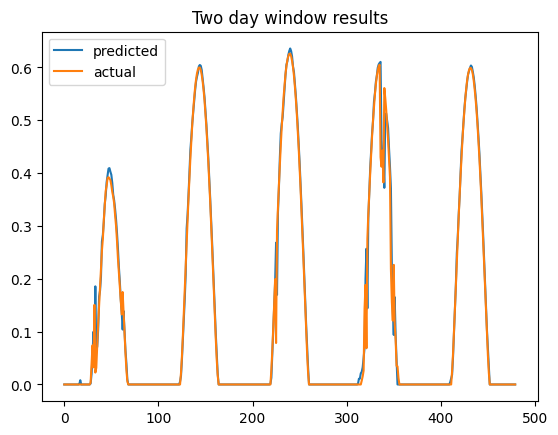

In [ ]:
print("Mean absolute error : " + str(error2))
print("Mean absolute percentage error : " + str(error1))
plt.plot(predictions) 
plt.plot(y_test) 
plt.title('Two day window results')
plt.legend(['predicted', 'actual'])
plt.show()